# Лекция 10. Библиотека Pandas

## Работа с данными из системы Яндекс.Контест

Проанализируем данные по домашней работе к лекции №4 "Числовые данные" с помощью бибилиотеки Pandas. Первым шагом импортируем библиотеку Pandas и загружаем [файл с результатами](https://drive.google.com/file/d/1HXAN02aFogUygSxN7Tz06jUPbro-9pBn/view). 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O "result_lec04.csv" "https://drive.google.com/uc?id=1HXAN02aFogUygSxN7Tz06jUPbro-9pBn&export=download"

--2021-12-08 04:27:17--  https://drive.google.com/uc?id=1HXAN02aFogUygSxN7Tz06jUPbro-9pBn&export=download
Resolving drive.google.com (drive.google.com)... 142.250.152.138, 142.250.152.102, 142.250.152.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.152.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pqhmvgt8uekcc5pn5urd4ijegn1i2mcj/1638937575000/05476118052512889131/*/1HXAN02aFogUygSxN7Tz06jUPbro-9pBn?e=download [following]
--2021-12-08 04:27:18--  https://doc-0s-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pqhmvgt8uekcc5pn5urd4ijegn1i2mcj/1638937575000/05476118052512889131/*/1HXAN02aFogUygSxN7Tz06jUPbro-9pBn?e=download
Resolving doc-0s-1g-docs.googleusercontent.com (doc-0s-1g-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-0s-1g-docs.googleusercontent.com (d

Считываем файл и выведим первые 5 строк.


In [ ]:
df_res4 = pd.read_csv("result_lec04.csv")

In [ ]:
df_res4.tail(15)

,Unnamed: 0,Факультет,login,1(ФИО),2(Факультет),3(Binary to decimal conversion),4(Calculating the fraction),5(Sum of a sequence of numbers),6(Element of a geometric progression),7(Bank deposit with CSV file),8(Согласие на обработку персональных данных),Score,Penalty
577,577,Не из МГУ,6d3c0a5c6b2221166aa6a0175a6b980a1aa832b5,+,+,-1,NaN,NaN,NaN,NaN,NaN,2,0
578,578,Факультет журналистики,f31cb3e1d47bd5a779436703c022ee68cc0653e4,+,+,-1,NaN,-1,NaN,NaN,NaN,2,0
579,579,Механико-математический факультет,986b83299cab9095e565951824d45cade265bbab,+,+,NaN,NaN,NaN,NaN,NaN,NaN,2,0
580,580,Физический факультет,d5a866441c4a69303e124e2074113a8981e87ba9,+,+,NaN,NaN,NaN,NaN,NaN,NaN,2,0
581,581,NaN,65a45f47600abeb3aace52d1170e7219ca65c2ac,NaN,NaN,+,NaN,NaN,NaN,NaN,+,2,13018
582,582,NaN,4c249a917ecdd273356ab97285af53e43060f732,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
583,583,NaN,3b2d075bdf9f98d3b35fb26c3664be879e7fe175,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
584,584,NaN,b7290a66959ec510626b54e98fe2cbc95e2ca716,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
585,585,NaN,53910656ffea0a9877439247952795f43014ee44,+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
586,586,NaN,337efde4e8d189ed9faee19c5a63f39a03414c24,+,NaN,-1,-2,NaN,NaN,NaN,NaN,1,0


Удаляем колонки, которые нам не пригодяться для дальнейшего анализа.

In [ ]:
df_res4.drop(['Unnamed: 0', '1(ФИО)', '2(Факультет)', '8(Согласие на обработку персональных данных)', 'Penalty'], axis = 1, inplace=True)

In [ ]:
df_res4.shape  # 592 строки, 8 столбцов

(592, 8)

Выведем информацию о колонках датасета: название, тип значений (целочисленный, вещественный, строковый и т.д.).

In [ ]:
df_res4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Факультет                              562 non-null    object
 1   login                                  592 non-null    object
 2   3(Binary to decimal conversion)        575 non-null    object
 3   4(Calculating the fraction)            566 non-null    object
 4   5(Sum of a sequence of numbers)        559 non-null    object
 5   6(Element of a geometric progression)  547 non-null    object
 6   7(Bank deposit with CSV file)          433 non-null    object
 7   Score                                  592 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 37.1+ KB


Приведем названия колонок к единому виду: все символы в названии колонок должны быть в нижнем регистре, между словами в названии должен быть символ «_».

In [ ]:
df_res4.columns

Index(['Факультет', 'login', '3(Binary to decimal conversion)',
       '4(Calculating the fraction)', '5(Sum of a sequence of numbers)',
       '6(Element of a geometric progression)',
       '7(Bank deposit with CSV file)', 'Score'],
      dtype='object')

In [ ]:
column_names = df_res4.columns
df_res4.columns = [col_name.lower().replace(')', '').replace('(', '_').replace(' ', '_') for col_name in column_names]
df_res4.columns

Index(['факультет', 'login', '3_binary_to_decimal_conversion',
       '4_calculating_the_fraction', '5_sum_of_a_sequence_of_numbers',
       '6_element_of_a_geometric_progression', '7_bank_deposit_with_csv_file',
       'score'],
      dtype='object')

Факультет - это категориальный признак. Распечатаем все возможные значения с количеством повторений этих значений.

In [ ]:
df_res4['факультет'].value_counts()

Факультет вычислительной математики и кибернетики        129
Физический факультет                                     108
Механико-математический факультет                         93
Не из МГУ                                                 41
Химический факультет                                      40
Экономический факультет                                   27
Биологический факультет                                   25
Московская школа экономики                                10
Факультет наук о материалах                                8
Географический факультет                                   8
Философский факультет                                      7
Факультет фундаментальной медицины                         6
Исторический факультет                                     6
Геологический факультет                                    6
Факультет биоинженерии и биоинформатики                    5
Социологический факультет                                  5
Высшая школа современных

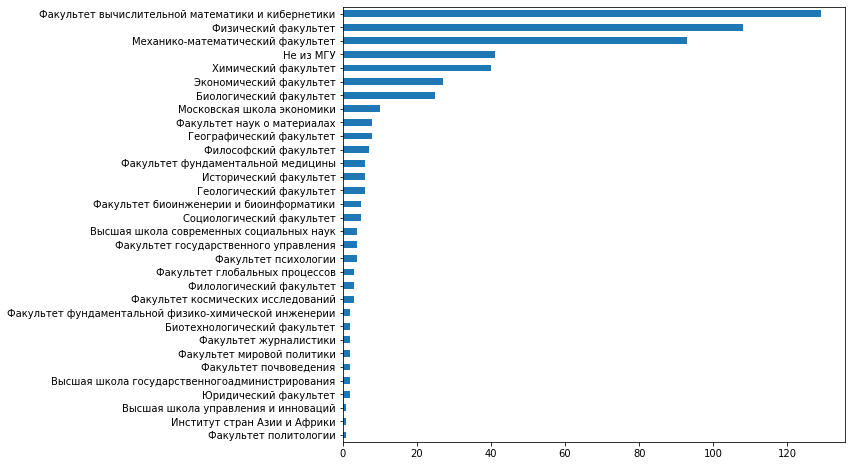

In [ ]:
df_res4['факультет'].value_counts().sort_values(ascending=True).plot(kind = 'barh', figsize=(9, 8)) #kind = 'bar'

Удалим строки, для которых не заполнен факультет. 

In [ ]:
df_res4.dropna(subset = ['факультет'], axis=0, inplace=True)

Проверим, в каких столбцах есть пустые значения.

In [ ]:
df_res4.isna()

,факультет,login,3_binary_to_decimal_conversion,4_calculating_the_fraction,5_sum_of_a_sequence_of_numbers,6_element_of_a_geometric_progression,7_bank_deposit_with_csv_file,score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
576,False,False,True,True,True,True,True,False
577,False,False,False,True,True,True,True,False
578,False,False,False,True,False,True,True,False
579,False,False,True,True,True,True,True,False


In [ ]:
df_res4.isna().any()

факультет                               False
login                                   False
3_binary_to_decimal_conversion           True
4_calculating_the_fraction               True
5_sum_of_a_sequence_of_numbers           True
6_element_of_a_geometric_progression     True
7_bank_deposit_with_csv_file             True
score                                   False
dtype: bool

Проверим, какие значения есть в данных по столбцу ```7_bank_deposit_with_csv_file ```.



In [ ]:
df_res4['7_bank_deposit_with_csv_file'].unique()

array(['+', '+1', '+2', '+4', '+3', '+5', '+11', '+6', '+7', '+10', '+8',
       '+9', '+16', '+14', '+12', '+15', '+41', '+13', nan, '-1', '-5',
       '-2', '-17', '-4', '-9', '-3', '-7', '-6', '-12'], dtype=object)

`+` - задача сдана (число - это количество посылок в систему)

`-` - решение задачи неверное (число - это количество посылок в систему)

`пустое значение` - задача не решалась

Заменим отрицальные и пустые значения - 0. А положительные значения - 1.

In [ ]:
df_res4.fillna(0, inplace = True)
df_res4.tail()

,факультет,login,3_binary_to_decimal_conversion,4_calculating_the_fraction,5_sum_of_a_sequence_of_numbers,6_element_of_a_geometric_progression,7_bank_deposit_with_csv_file,score
576,Не из МГУ,649785e57a2a3aee0e9ac4a21e415f5933885b9a,0,0,0,0,0,2
577,Не из МГУ,6d3c0a5c6b2221166aa6a0175a6b980a1aa832b5,-1,0,0,0,0,2
578,Факультет журналистики,f31cb3e1d47bd5a779436703c022ee68cc0653e4,-1,0,-1,0,0,2
579,Механико-математический факультет,986b83299cab9095e565951824d45cade265bbab,0,0,0,0,0,2
580,Физический факультет,d5a866441c4a69303e124e2074113a8981e87ba9,0,0,0,0,0,2


In [ ]:
def func_score(s):
  if s == 0:
    return 0
  elif s[0] == '+':
    return 1
  else:
    return 0

In [ ]:
df_res4['7_bank_deposit_with_csv_file'] = df_res4['7_bank_deposit_with_csv_file'].apply(func_score)

In [ ]:
df_res4['7_bank_deposit_with_csv_file'].unique()

array([1, 0])

То же самое проделаем для данных по всем задачам.

In [ ]:
for column in df_res4.columns[2:6]:
  df_res4[column] = df_res4[column].apply(func_score)

## Визуализация

Посмотрим, сколько человек решили каждую из задач.

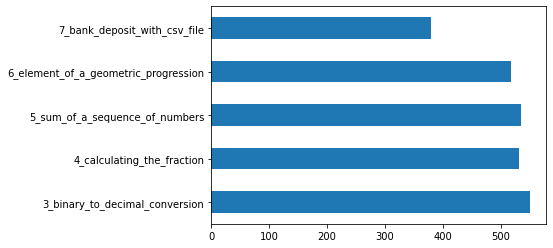

In [ ]:
tasks = df_res4.columns[2:7]
df_res4[tasks].sum().plot(kind='barh')

## Объединение данных из нескольких таблиц

В одной таблице хранятся данные только по одному домашнему заданию. Чтобы получить полную картину по результатам выполнения домашних работ, необходимо объединить все данные. Объединим результаты выполнения домашнего задания к лекции 4 и домашнего задания к лекции 5.

## merge

In [ ]:
hw4 = {'login':  ['login1', 'login2', 'login3'], \
       'score4': [5, 4, 5]}
hw5 = {'login':  ['login3', 'login1', 'login4', 'login5'], \
       'score5': [2, 0, 5, 4]}

In [ ]:
df_hw4 = pd.DataFrame(hw4)
df_hw5 = pd.DataFrame(hw5)

In [ ]:
df_hw4

,login,score4
0,login1,5
1,login2,4
2,login3,5


In [ ]:
df_hw5

,login,score5
0,login3,2
1,login1,0
2,login4,5
3,login5,4


In [ ]:
df_hw4.merge(df_hw5, on = 'login', how = 'inner')

,login,score4,score5
0,login1,5,0
1,login3,5,2


In [ ]:
df_full = df_hw4.merge(df_hw5, on = 'login', how = 'outer')
df_full

,login,score4,score5
0,login1,5.0,0.0
1,login2,4.0,NaN
2,login3,5.0,2.0
3,login4,NaN,5.0
4,login5,NaN,4.0


In [ ]:
full_names_msu = {'login':  ['login1', 'login2', 'login3', 'login4', 'login6'],\
              'names': ['name1', 'name2', 'name3', 'name4', 'name6']}
df_msu = pd.DataFrame(full_names_msu)

In [ ]:
df_msu.merge(df_full, on = 'login', how = 'left')

,login,names,score4,score5
0,login1,name1,5.0,0.0
1,login2,name2,4.0,NaN
2,login3,name3,5.0,2.0
3,login4,name4,NaN,5.0
4,login6,name6,NaN,NaN


In [ ]:
df_full.merge(df_msu, on = 'login', how = 'left')

,login,score4,score5,names
0,login1,5.0,0.0,name1
1,login2,4.0,NaN,name2
2,login3,5.0,2.0,name3
3,login4,NaN,5.0,name4
4,login5,NaN,4.0,NaN


In [ ]:
df_msu.merge(df_full, on = 'login', how = 'right')

,login,names,score4,score5
0,login1,name1,5.0,0.0
1,login2,name2,4.0,NaN
2,login3,name3,5.0,2.0
3,login4,name4,NaN,5.0
4,login5,NaN,NaN,4.0


## Объединение данных из контеста

Агрегируем данные. 

In [ ]:
df_res4.columns

Index(['факультет', 'login', '3_binary_to_decimal_conversion',
       '4_calculating_the_fraction', '5_sum_of_a_sequence_of_numbers',
       '6_element_of_a_geometric_progression', '7_bank_deposit_with_csv_file',
       'score'],
      dtype='object')

In [ ]:
df_res4.drop('score', axis=1, inplace=True)

In [ ]:
df_res4['score'] = df_res4.apply(lambda row: row['3_binary_to_decimal_conversion'] + row['4_calculating_the_fraction']\
                       +row['5_sum_of_a_sequence_of_numbers'] + row['6_element_of_a_geometric_progression'] \
                       + row['7_bank_deposit_with_csv_file'], axis=1)

In [ ]:
df_res4.drop(df_res4.columns[2:7], axis=1, inplace=True)

In [ ]:
df_res4.tail()

,факультет,login,score
576,Не из МГУ,649785e57a2a3aee0e9ac4a21e415f5933885b9a,0
577,Не из МГУ,6d3c0a5c6b2221166aa6a0175a6b980a1aa832b5,0
578,Факультет журналистики,f31cb3e1d47bd5a779436703c022ee68cc0653e4,0
579,Механико-математический факультет,986b83299cab9095e565951824d45cade265bbab,0
580,Физический факультет,d5a866441c4a69303e124e2074113a8981e87ba9,0


In [ ]:
!wget -O "result_lec05.csv" "https://drive.google.com/uc?id=12r-Y3lOw6nPAVN1VtZM9gWoBDRcwF-Bg&export=download"

--2021-12-08 04:28:43--  https://drive.google.com/uc?id=12r-Y3lOw6nPAVN1VtZM9gWoBDRcwF-Bg&export=download
Resolving drive.google.com (drive.google.com)... 142.250.152.100, 142.250.152.101, 142.250.152.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.152.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aquk75jcu226r94t7j5lokhl2jdj5ivf/1638937650000/05476118052512889131/*/12r-Y3lOw6nPAVN1VtZM9gWoBDRcwF-Bg?e=download [following]
--2021-12-08 04:28:44--  https://doc-0o-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aquk75jcu226r94t7j5lokhl2jdj5ivf/1638937650000/05476118052512889131/*/12r-Y3lOw6nPAVN1VtZM9gWoBDRcwF-Bg?e=download
Resolving doc-0o-1g-docs.googleusercontent.com (doc-0o-1g-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-0o-1g-docs.googleusercontent.com (d

In [ ]:
df_res5 = pd.read_csv("result_lec05.csv")

In [ ]:
df_res5.head(15)

,Unnamed: 0,login,1(ФИО),2(Факультет),3(Две команды),4(Неопубликованный шедевр),5(Транспонирование),6(Логирование звонков),7(Согласие на обработку персональных данных),Score,Penalty
0,0,fbfc5d6ad4c6bf3fb324392fb69493abf458a70a,+,+,+,+,+,+,+,7,3
1,1,5f573d6862c12cf65380db14a20a8b38af2fdc87,+,+,+,+,+,+,+,7,4
2,2,9b0ea49f8304ecd88fc0d325a4321b760b8850bd,+,+,+,+,+,+,+,7,6
3,3,f6ece086ffc99cc0c964cf210ac28bd136e5c832,+,+,+,+,+,+,+,7,8
4,4,851f8c0ecfacae4a02552246a8c500d6000b5c27,+,+,+,+,+,+,+,7,9
5,5,4e9e7211e52c739bf8306f760f2e5aeac39638f2,+,+,+,+,+,+,+,7,10
6,6,669cfced9d7181d42bb84c6a8a976e524de2f429,+,+,+,+,+,+,+,7,10
7,7,41747d3351e7134e02d3a8c580945a6b7393bcfd,+,+,+,+,+,+,+,7,10
8,8,e846adc68ab04c06b4021a1b29bfbdbcd4fe0121,+,+,+,+,+,+,+,7,11
9,9,15cd5ff3626ebe87e54c6158afac933e691f2995,+,+,+,+,+,+,+,7,12


In [ ]:
df_res5.drop(['Unnamed: 0', '1(ФИО)', '2(Факультет)', 'Score', 'Penalty' , '7(Согласие на обработку персональных данных)'], axis = 1, inplace=True)

In [ ]:
column_names = df_res5.columns
df_res5.columns = [col_name.lower().replace(')', '').replace('(', '_').replace(' ', '_') for col_name in column_names]
df_res5.columns

Index(['login', '3_две_команды', '4_неопубликованный_шедевр',
       '5_транспонирование', '6_логирование_звонков'],
      dtype='object')

In [ ]:
df_res5.fillna(0, inplace = True)
for column in df_res5.columns[1:5]:
  df_res5[column] = df_res5[column].apply(func_score)

In [ ]:
df_res5['score'] = df_res5.apply(lambda row: row['3_две_команды'] + row['4_неопубликованный_шедевр']\
                       +row['5_транспонирование'] + row['6_логирование_звонков'] \
                       , axis=1)

In [ ]:
df_res5.drop(df_res5.columns[1:5], axis=1, inplace=True)

In [ ]:
df_res4.shape

(562, 3)

In [ ]:
df_res5.shape

(538, 2)

In [ ]:
df = df_res4.merge(df_res5, on = 'login', how = 'left')
df

,факультет,login,score_x,score_y
0,Московская школа экономики,b7130fe59e99562e3021d4d91ee08ffff901767d,5,3.0
1,Факультет глобальных процессов,41747d3351e7134e02d3a8c580945a6b7393bcfd,5,4.0
2,Социологический факультет,851f8c0ecfacae4a02552246a8c500d6000b5c27,5,4.0
3,Московская школа экономики,f7cf7be1d95fa902574ba091b9ff09d9882989b2,5,3.0
4,Московская школа экономики,f5574bb030871502b8d18328d85223699150b266,5,3.0
...,...,...,...,...
557,Не из МГУ,649785e57a2a3aee0e9ac4a21e415f5933885b9a,0,NaN
558,Не из МГУ,6d3c0a5c6b2221166aa6a0175a6b980a1aa832b5,0,NaN
559,Факультет журналистики,f31cb3e1d47bd5a779436703c022ee68cc0653e4,0,NaN
560,Механико-математический факультет,986b83299cab9095e565951824d45cade265bbab,0,NaN


In [ ]:
df = df_res4.merge(df_res5, on = 'login', how = 'left', suffixes=('_4', '_5'))
df

,факультет,login,score_4,score_5
0,Московская школа экономики,b7130fe59e99562e3021d4d91ee08ffff901767d,5,3.0
1,Факультет глобальных процессов,41747d3351e7134e02d3a8c580945a6b7393bcfd,5,4.0
2,Социологический факультет,851f8c0ecfacae4a02552246a8c500d6000b5c27,5,4.0
3,Московская школа экономики,f7cf7be1d95fa902574ba091b9ff09d9882989b2,5,3.0
4,Московская школа экономики,f5574bb030871502b8d18328d85223699150b266,5,3.0
...,...,...,...,...
557,Не из МГУ,649785e57a2a3aee0e9ac4a21e415f5933885b9a,0,NaN
558,Не из МГУ,6d3c0a5c6b2221166aa6a0175a6b980a1aa832b5,0,NaN
559,Факультет журналистики,f31cb3e1d47bd5a779436703c022ee68cc0653e4,0,NaN
560,Механико-математический факультет,986b83299cab9095e565951824d45cade265bbab,0,NaN


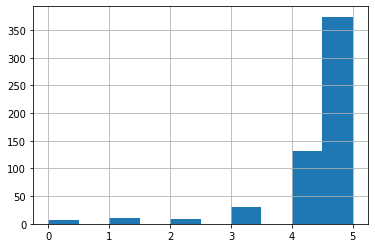

In [ ]:
df['score_4'].hist()

## groupby

In [ ]:
df[df['факультет'] == 'Физический факультет']['score_4'].mean()

4.435185185185185

In [ ]:
df[df['факультет'] == 'Социологический факультет']['score_4'].mean()

4.4

In [ ]:
df[df['факультет'] == 'Факультет вычислительной математики и кибернетики']['score_4'].mean()

4.6976744186046515

In [ ]:
df[df['факультет'] == 'Не из МГУ']['score_4'].mean()

4.073170731707317

In [ ]:
df.groupby('факультет')['score_4'].mean()

факультет
Биологический факультет                                  3.880000
Биотехнологический факультет                             3.000000
Высшая школа государственногоадминистрирования           5.000000
Высшая школа современных социальных наук                 4.750000
Высшая школа управления и инноваций                      4.000000
Географический факультет                                 5.000000
Геологический факультет                                  5.000000
Институт стран Азии и Африки                             1.000000
Исторический факультет                                   3.333333
Механико-математический факультет                        4.741935
Московская школа экономики                               4.900000
Не из МГУ                                                4.073171
Социологический факультет                                4.400000
Факультет биоинженерии и биоинформатики                  4.800000
Факультет вычислительной математики и кибернетики        4.697674


In [ ]:
df.groupby('факультет')[['score_4', 'score_5']].mean()

,score_4,score_5
факультет,,
Биологический факультет,3.880000,3.000000
Биотехнологический факультет,3.000000,3.000000
Высшая школа государственногоадминистрирования,5.000000,4.000000
Высшая школа современных социальных наук,4.750000,3.750000
Высшая школа управления и инноваций,4.000000,4.000000
Географический факультет,5.000000,3.625000
Геологический факультет,5.000000,4.000000
Институт стран Азии и Африки,1.000000,NaN
Исторический факультет,3.333333,3.500000


# Индексация

In [ ]:
hw5 = {'login':  ['login3', 'login1', 'login4', 'login5'], \
       'score4': [2, 0, 5, 4], 'score5': [5, 3, 5, 4],'score6': [5, 3, 5, 4],}
df_hw5 = pd.DataFrame(hw5)
df_hw5

,login,score4,score5,score6
0,login3,2,5,5
1,login1,0,3,3
2,login4,5,5,5
3,login5,4,4,4


In [ ]:
type(df_hw5['login'])

pandas.core.series.Series

In [ ]:
df_hw5.iloc[1]

login     login1
score4         0
score5         3
score6         3
Name: 1, dtype: object

In [ ]:
logins = ['login3', 'login1', 'login4', 'login5']
logins[1:3]

['login1', 'login4']

In [ ]:
df_hw5.iloc[1:3]

,login,score4,score5,score6
1,login1,0,3,3
2,login4,5,5,5


In [ ]:
df_hw5.iloc[:3, 1:3]

,score4,score5
0,2,5
1,0,3
2,5,5


In [ ]:
df_hw5.loc[1:3]

,login,score4,score5,score6
1,login1,0,3,3
2,login4,5,5,5
3,login5,4,4,4


In [ ]:
df_hw5_sort = df_hw5.set_index('login').sort_index()
df_hw5_sort

,score4,score5,score6
login,,,
login1,0,3,3
login3,2,5,5
login4,5,5,5
login5,4,4,4


In [ ]:
df_hw5_sort.loc['login3':'login4']

,score4,score5,score6
login,,,
login3,2,5,5
login4,5,5,5


In [ ]:
df_hw5_sort.loc['login3':'login4', 'score5':]

,score5,score6
login,,
login3,5,5
login4,5,5


In [ ]:
hw5 = {'login':  ['login3', 'login1', 'login4', 'login5'], \
       'score4': [2, 0, 5, 4], 'score5': [5, 3, 5, 4],'score6': [5, 3, 5, 4],}
df_hw5 = pd.DataFrame(hw5)
df_hw5

,login,score4,score5,score6
0,login3,2,5,5
1,login1,0,3,3
2,login4,5,5,5
3,login5,4,4,4


In [ ]:
df_hw5.index = [1, 2, 3, 4]
df_hw5

,login,score4,score5,score6
1,login3,2,5,5
2,login1,0,3,3
3,login4,5,5,5
4,login5,4,4,4


In [ ]:
df_hw5.loc[2:3]

,login,score4,score5,score6
2,login1,0,3,3
3,login4,5,5,5


In [ ]:
df_hw5.iloc[1]

login     login1
score4         0
score5         3
score6         3
Name: 2, dtype: object

In [ ]:
df_hw5.loc[2:3]

,login,score4,score5,score6
2,login1,0,3,3
3,login4,5,5,5


In [ ]:
df_hw5.loc[1]

login     login3
score4         2
score5         5
score6         5
Name: 1, dtype: object

## Сохранение данных, работа с excel

In [ ]:
df_res4.to_csv('new.csv')

In [ ]:
df_res4.to_excel('new.xlsx')

In [ ]:
df_excel = pd.read_excel('new.xlsx')

In [ ]:
df_excel